# Condition Monitoring of Hydraulic Systems Data Set 
- The data set is retrieved from UCI Machine Learning Repository
- The data set was experimentally obtained with a hydraulic test rig. This test rig consists of a primary working and a secondary cooling-filtration circuit which are connected via the oil tank. 
- The system cyclically repeats constant load cycles (duration 60 seconds) and measures **process values such as pressures, volume flows and temperatures** while the condition of four hydraulic components **(cooler, valve, pump and accumulator)** is quantitatively varied.

# Goal: Create a model to predict the target class:
## Stable Flag 
- **0: conditions were stable**
- **1: static conditions might not have been reached yet**


## Attribute Information: 
- The data set contains raw process sensor data (i.e. without feature extraction) which are structured as matrices (tab-delimited) with the rows representing the cycles and the columns the data points within a cycle. 

- The sensors involved are: 

    ** Sensor |	Physical quantity|	Unit	|Sampling rate **
    - PS1	Pressure	bar	100 Hz 
    - PS2	Pressure	bar	100 Hz 
    - PS3	Pressure	bar	100 Hz 
    - PS4	Pressure	bar	100 Hz 
    - PS5	Pressure	bar	100 Hz 
    - PS6	Pressure	bar	100 Hz 
    - EPS1	Motor power	W	100 Hz 
    - FS1	Volume flow	l/min	10 Hz 
    - FS2	Volume flow	l/min	10 Hz 
    - TS1	Temperature	Â°C	1 Hz 
    - TS2	Temperature	Â°C	1 Hz 
    - TS3	Temperature	Â°C	1 Hz 
    - TS4	Temperature	Â°C	1 Hz 
    - VS1	Vibration	mm/s	1 Hz 
    - CE	Cooling efficiency (virtual)	%	1 Hz 
    - CP	Cooling power (virtual)	kW	1 Hz     
    - SE	Efficiency factor	%	1 Hz 

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import os

pd.set_option('display.max_columns', None)  # set option to view all columns 

In [2]:
pwd() # Check the working directory

'/Users/RTCRichard/Desktop'

In [3]:
path = '/Users/RTCRichard/Desktop/data' # save the path 

## Open, save and merge the files 

In [4]:
def get_file(file_name, path):
    '''
    A function that takes in two inputs, file_name and path, and returns an open file that is tab-delimited 
    '''
    return pd.read_csv(os.path.join(path, file_name), sep='\t')#, header=None)

In [5]:
profile = get_file(path=path, file_name = 'profile.txt') # Contains the target labels: Cooler Condition, Valve Condition, Internal Pump Leakage, Hydraulic Accumulator, and Stable Flag 
# Files containing pressure data
pressure_file1 = get_file(path=path, file_name='PS1.txt')
pressure_file2 = get_file(path=path, file_name='PS2.txt')
pressure_file3 = get_file(path=path, file_name='PS3.txt')
pressure_file4 = get_file(path=path, file_name='PS4.txt')
pressure_file5 = get_file(path=path, file_name='PS5.txt')
pressure_file6 = get_file(path=path, file_name='PS6.txt')

# Files containing temperature data
temp_file1 = get_file(path=path, file_name='TS1.txt')
temp_file2 = get_file(path=path, file_name='TS2.txt')
temp_file3 = get_file(path=path, file_name='TS3.txt')
temp_file4 = get_file(path=path, file_name='TS4.txt')

# Files containing volume flow data
vol_file1 = get_file(path=path, file_name='FS1.txt')
vol_file2 = get_file(path=path, file_name='FS2.txt')

# File containing motor power data
motor_power_file = get_file(path=path, file_name='EPS1.txt')

# File containing motor power data
vibration_file = get_file(path=path, file_name='VS1.txt')

# File containing cooling efficiency data
cooling_eff_file = get_file(path=path, file_name='CE.txt')

# File containing cooling power data
cooling_power_file = get_file(path=path, file_name='CP.txt')

# File containing efficiency factor data
efficiency_factor_file = get_file(path=path, file_name='SE.txt')


** Store the files in a dictionary**

In [6]:
compiled_files = {'ps1':pressure_file1,'ps2':pressure_file2,'ps3':pressure_file3,'ps4':pressure_file4,
                  'ps5':pressure_file5,'ps6':pressure_file6,'ts1':temp_file1,'ts2':temp_file2,
                  'ts3':temp_file3,'ts4':temp_file4,'vs1':vol_file1,'vs4':vol_file2,
                  'eps1':motor_power_file,'vs1':vibration_file,'ce':cooling_eff_file,'cp':cooling_power_file,
                  'se':efficiency_factor_file, 'Stable Flag':profile['1']}

** Check for null values and check the shape of the datasets **

In [7]:
for key,value in compiled_files.items(): # Iterate through compiled_files dictionary and print out missing values
    print('number of missing values in {}: '.format(key), value.T.isnull().any().sum())

number of missing values in ps1:  0
number of missing values in ps2:  0
number of missing values in ps3:  0
number of missing values in ps4:  0
number of missing values in ps5:  0
number of missing values in ps6:  0
number of missing values in ts1:  0
number of missing values in ts2:  0
number of missing values in ts3:  0
number of missing values in ts4:  0
number of missing values in vs1:  0
number of missing values in vs4:  0
number of missing values in eps1:  0
number of missing values in ce:  0
number of missing values in cp:  0
number of missing values in se:  0
number of missing values in Stable Flag:  0


In [8]:
for file in compiled_files: # Iterate through compiled_files and print the shape.  There should be 2205 columns and varying indices. 
    print(file,compiled_files[file].shape)
# The columns and indices are switched

ps1 (2204, 6000)
ps2 (2204, 6000)
ps3 (2204, 6000)
ps4 (2204, 6000)
ps5 (2204, 6000)
ps6 (2204, 6000)
ts1 (2204, 60)
ts2 (2204, 60)
ts3 (2204, 60)
ts4 (2204, 60)
vs1 (2204, 60)
vs4 (2204, 600)
eps1 (2204, 6000)
ce (2204, 60)
cp (2204, 60)
se (2204, 60)
Stable Flag (2204,)


** Aggregate and manipulate the files**
- Transpose the files so each record is a row and each instance is a column
    - Currently, the shape of the files are **(2205,n)**. Instead, it should be **(n rows, 2205 columns)**
- Aggregate each file by mean
- ** i.e. ** Look at the ps1 file
    - There are 2205 instances with 6000 records for each instance.
    - Find the mean for each instance
    - Save aggregated file into a dictionary

In [9]:
averages = {} # Initialize an empty dictionary

for file in compiled_files: # Iterate through compile_files
    if file == 'Stable Flag':
        averages[file] = compiled_files[file]
        continue
    averages[file] = compiled_files[file].T.mean() # Transpose the file and calculate the mean


In [10]:
sensor_data = pd.concat(averages, axis=1,ignore_index=False) # Concatenate the files in the averages dictionary 


## Data Description
- After preprocessing, sensor_data should have:
    - no null values 
    - 17 columns and 2205 rows
    - The target class is 'Stable Flag'
    - Stable Flag should be an integer
    - All other columns should be floats

In [11]:
sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 17 columns):
Stable Flag    2204 non-null int64
ce             2204 non-null float64
cp             2204 non-null float64
eps1           2204 non-null float64
ps1            2204 non-null float64
ps2            2204 non-null float64
ps3            2204 non-null float64
ps4            2204 non-null float64
ps5            2204 non-null float64
ps6            2204 non-null float64
se             2204 non-null float64
ts1            2204 non-null float64
ts2            2204 non-null float64
ts3            2204 non-null float64
ts4            2204 non-null float64
vs1            2204 non-null float64
vs4            2204 non-null float64
dtypes: float64(16), int64(1)
memory usage: 292.8 KB


In [12]:
sensor_data.shape # returns the dimensionality of the dataframe

(2204, 17)

In [13]:
sensor_data['Stable Flag'].value_counts() # Calculate the count for each unique value


0    1449
1     755
Name: Stable Flag, dtype: int64

## Exploratory Data Analysis
- **Outlier and missing value detection**
    - To detect outliers, I plotted each attribute using a boxplot. I found that there are many outliers especially in **eps1, ps1,ps2, ps3, ps4, se, and vs1**. However, I chose to keep the outliers because the number of datapoints is relatively small and there would be a loss of variability if the few oultiers were lost. 
    - There were no missing values.  But if there were missing values, I would look at the distribution of the datapoints and see if I should either throw away all the indexes with missing values or impute the values with mean, median, or the mode.

In [14]:
sensor_data.describe()

,Stable Flag,ce,cp,eps1,ps1,ps2,ps3,ps4,ps5,ps6,se,ts1,ts2,ts3,ts4,vs1,vs4
count,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000
mean,0.342559,31.295310,1.808374,2495.489502,160.485229,109.379867,1.753119,2.601446,9.163012,9.079068,55.286144,45.429014,50.370238,47.666292,40.739733,0.613332,9.649156
std,0.474673,11.576605,0.278323,73.847642,4.700489,4.987717,0.251908,4.279967,0.576246,0.549540,8.961843,7.991017,7.395228,7.451005,8.107455,0.060268,0.449131
min,0.000000,17.555983,1.062150,2361.747267,155.391547,104.406307,0.840252,0.000000,8.365800,8.321527,18.276617,35.313783,40.859400,38.245733,30.390800,0.524367,8.857513
25%,0.000000,20.084075,1.550063,2442.925225,158.100135,106.961874,1.729733,0.000000,8.547152,8.487017,56.269371,36.237362,41.864471,39.123633,31.271787,0.555096,9.203254
50%,0.000000,27.391500,1.739608,2480.921533,158.959798,107.728562,1.779622,0.000000,9.115681,9.031103,58.757900,44.837775,49.781508,47.070275,40.429167,0.610192,9.692160
75%,1.000000,46.677558,2.148483,2548.221625,161.000767,109.421433,1.932045,3.505464,9.844362,9.729312,59.657925,54.104417,58.585900,55.695183,49.410421,0.649900,10.154948
max,1.000000,47.903667,2.840100,2740.641000,180.922708,131.589089,2.023398,10.207068,9.978510,9.856591,60.755300,57.899283,61.958467,59.423167,53.060417,0.839067,10.403098


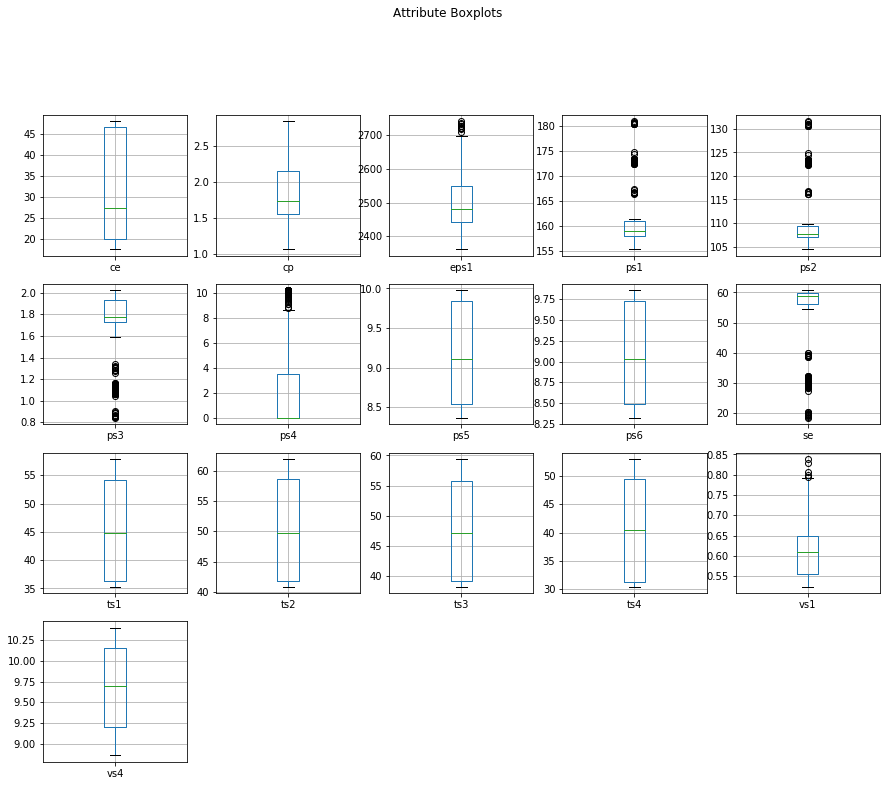

In [15]:
sensor_data.drop('Stable Flag',axis=1).plot(kind='box', subplots=True, grid=True, title="Attribute Boxplots",
        layout=(5, 5), sharex=True, sharey=False, legend=True, figsize = (15,15))

plt.figure('tight')

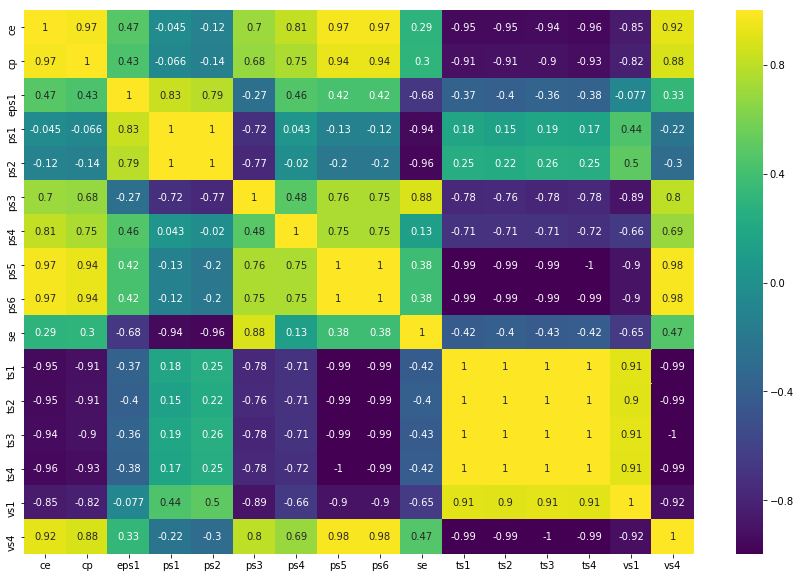

In [16]:
plt.figure(figsize = (15,10)) # Creates a blank figure with dimensions (15,10)
correlations = sensor_data.drop('Stable Flag',axis=1).corr() # Remove the target class and calcualte the correlations between each variable
sns.heatmap(correlations,cmap = 'viridis',annot=True) # Create a heatmap with the correlations listed 


## Model Fitting
- **Split samples into training/test sets**
    - The data will be split into training and test sets. The training set contains known outputs and the model is fitted with this data. However, the test set is a subset of the data that is used to test the model's prediction.
    - The training set will be composed with 70% of the total data and the test set will be 30% of the data.
 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = sensor_data.drop('Stable Flag', axis=1) # Save the dataset with the 'Stable Flag' excluded
y = sensor_data['Stable Flag']# Save the 'Stable Flag' feature (Target Feature)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Split the data into train, test, and validation sets.
# test_size is set to 0.33 or 33% of the data.
# random_state is set to 42 to gurantee that the output would be the same for each run

## Random Forest
- Random Forest was chosen because it is robust against outliers and is a good standard for quick classification while providing high accuracy
- Overfitting can be prevented with a high number of trees.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
rfc = RandomForestClassifier(n_estimators=600) # Instantiate the model with 600 estimators.
rfc.fit(X_train,y_train) # Fit the model using the training data
predictions = rfc.predict(X_test) # Create predictions based on the test set
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99       448
          1       1.00      0.94      0.97       214

avg / total       0.98      0.98      0.98       662

[[447   1]
 [ 12 202]]


## Logistic Regression
- The Target class, Stable Flag, is binary (0,1).  
- Since logistic regression is a sigmoid function, the decision boundary can be set to 0.5 where any value less than 0.5 would be classified as 0 and any value larger than 0.5 would classify to 1.
- The dataset contains multiple outliers. Logistic regression does not penalize outliers as much as in other models, i.e. linear regression.  
    - The cross-entropy function penalizes wrong predictions more than it rewards right predictions.

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logmodel = LogisticRegression() # Instantiate the model
logmodel.fit(X_train,y_train) # Fit the model using the training data
predictions = logmodel.predict(X_test) # Create predictions based on the test set

In [24]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.96      0.91      0.93       448
          1       0.82      0.91      0.86       214

avg / total       0.91      0.91      0.91       662

[[406  42]
 [ 19 195]]


## k-Nearest Neighbors
- KNN is non-parametric so it makes no assumptions about the data distribution.
- The dataset is relatively small so computation time is negligible.
- Outliers will be far away points and have lower probability of being selected.

** Standarize the data**
- Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [25]:
from sklearn.preprocessing import StandardScaler # import StandardScaler 
scaler = StandardScaler() #Instantiate the scaler 
scaler.fit(sensor_data.drop('Stable Flag', axis=1)) # fit the model to sensor_data with the 'Stable Flag' column removed

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
# transform the data and save it to scaled_features
scaled_features = scaler.transform(sensor_data.drop('Stable Flag', axis=1))

In [27]:
df_feat = pd.DataFrame(scaled_features,columns=sensor_data.columns[1:]) # create a dataframe of the features and slice off the 'Stable Flag' Columns
df_feat.head() # Look at the first 5 entries in df_feat

,ce,cp,eps1,ps1,ps2,ps3,ps4,ps5,ps6,se,ts1,ts2,ts3,ts4,vs1,vs4
0,-0.475971,-1.986715,0.487728,0.025129,-0.005009,0.885902,-0.607957,0.819507,0.819816,0.451960,-1.095484,-1.195295,-1.166191,-0.770560,-0.788018,1.679052
1,-0.784266,-2.498227,0.331006,-0.029261,-0.044323,0.869979,-0.607957,0.637956,0.635003,0.475122,-0.944802,-1.072257,-1.078534,-0.628402,-0.610716,1.596990
2,-0.936194,-2.681748,0.217418,-0.063229,-0.063181,0.768138,-0.607957,0.478749,0.470247,0.503220,-0.819852,-0.942207,-0.974977,-0.513257,-0.731315,1.455414
3,-0.994325,-2.651860,0.107814,-0.103153,-0.089928,0.673366,-0.607957,0.339776,0.330474,0.465314,-0.704087,-0.816588,-0.853198,-0.408585,-0.596885,1.310816
4,-1.049391,-2.646050,0.074732,-0.120232,-0.098702,0.635953,-0.607957,0.239792,0.232626,0.477375,-0.597001,-0.703264,-0.743985,-0.311841,-0.674611,1.179355


** Train, test, and split the the scaled_features**

In [28]:
X = scaled_features # Save the scaled features as X
y = sensor_data['Stable Flag'] # Save the target class as y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30) # Spit data into train and test sets. The test size should be 30% of the data and the train size should be 70% of the data.


In [29]:
from sklearn.neighbors import KNeighborsClassifier # Import the KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=1) # Instantiate the model with the 1 neighbor
knn.fit(X_train,y_train) # Fit the training set
pred = knn.predict(X_test) # Make predictions based on the test set

In [30]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[419   5]
 [ 17 221]]
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       424
          1       0.98      0.93      0.95       238

avg / total       0.97      0.97      0.97       662



## Choosing a K value
- Use **elbow method** to pick a good K value that minimizes the error rate.

In [31]:
error_rate = [] # Initialize error_rate with an empty list. 

for i in range(1,20):  # Iterate from range 1 to 20 to find the best number of neighbors that minimizes the K value
    knn = KNeighborsClassifier(n_neighbors=i) # Instantiate the classifier and set neighbors to the vlaue of the iterator
    knn.fit(X_train,y_train) # Fit the model with the training sets
    pred_i = knn.predict(X_test) # Predict on the target set.
    error_rate.append(np.mean(pred_i != y_test)) # Calculate the error rate and append it to the error_rate list

Text(0,0.5,'Error Rate')

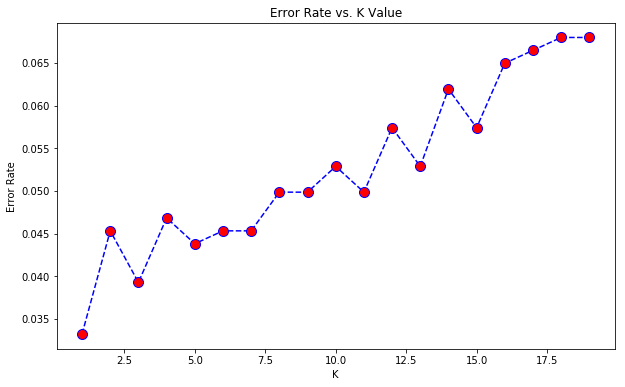

In [32]:
plt.figure(figsize=(10,6)) # Create a blank figure
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10) #
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

** K value of 1 and 5 have the lowest error rates. **

# Conclusion

- Based on the models and features, we are able to predict Stable Flag, with a high level of accuracy (f1-score > 0.90 in all models).  
- Specifically, the random forest and KNN Model had the highest accuracies, f1-score of 0.98 and 0.96, respectively. 
